#Predicting Score based on "Number of Study Hours per Day"




## Siddhanth Muragundi
siddhanthmuragundi@gmail.com

www.linkedin.com/in/siddhanth-muragundi-78b2791b7

## Description:
Predicting the percentage of a student based of no. of study hours per day by using simple linear regression.

## Importing the Libraries:

In [250]:
# importing basic libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Importing the data:

In [251]:
# importing the csv file
student_df=pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully.")


Data imported successfully.


## Data Pre-Processing:

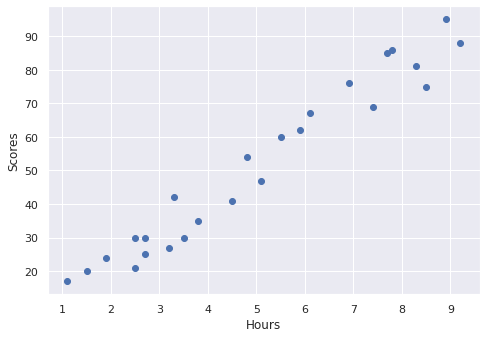

In [258]:
# Visualisation of relationship between Hours and Scores 
hours=student_df.Hours
scores=student_df.Scores
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(hours,scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

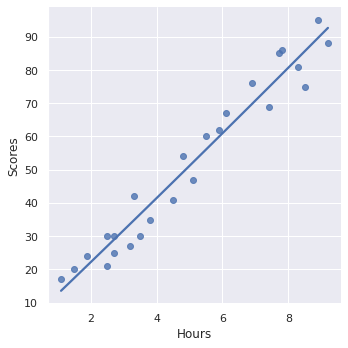

In [257]:
sns.set_theme()
sns.lmplot(x='Hours',y='Scores',data=student_df,order=2,ci=None)
plt.show()

In [259]:
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [270]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [269]:
student_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [260]:
X=np.array(student_df['Hours']).reshape(-1,1)
y=np.array(student_df['Scores']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


## Training the Algorithm:

In [261]:
regr=LinearRegression()
regr.fit(X_train,y_train)
print(regr.score(X_test,y_test))
print("Training complete.")

0.9367661043365056
Training complete.


## Making the Predictions:

In [264]:
y_pred=regr.predict(X_test)
y_pred


array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

In [265]:
new_df=pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})
new_df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


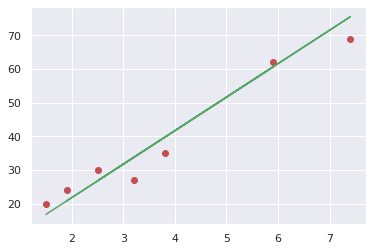

In [266]:
plt.scatter(X_test,y_test,color='r')
plt.plot(X_test,y_pred,color='g')
plt.show()

In [267]:
hours=9.25
pred_score=regr.predict([[9.25]])
print(f'Predicted score if a student studies for {hours} hours/day is {pred_score[0][0]:.2f}')

Predicted score if a student studies for 9.25 hours/day is 93.89


## Evaluating the Model:

In [268]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse=mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
cod=r2_score(y_true=y_test, y_pred=y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('Coefficient of Determination:',cod)

MAE: 4.130879918502482
MSE: 20.33292367497996
RMSE: 4.509204328368805
Coefficient of Determination: 0.9367661043365056


References:

1.https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
2.https://bit.ly/2HxiGGJ
